# Knock Airport Weather

***

### Import dataframe

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

***

### Import CSV file

In [29]:
directory = '../assignments/'
file = 'hly4935_clean.csv'
df = pd.read_csv(directory + file)

C:\Users\caina\AppData\Local\Temp\ipykernel_193992\2534783790.py:3: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(directory + file)


***

### Converting date column to standard format and converting wind speed column to numeric type

In [30]:
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')

***

### Plotting the first 300 rows of the data into a table

In [31]:
daily_mean_temp = df.groupby(df['date'].dt.date)['temp'].mean().round(2)
monthly_mean_temp = df.groupby(df['date'].dt.to_period('M'))['temp'].mean().round(2)
daily_mean_windspeed = df.groupby(df['date'].dt.date)['wdsp'].mean().round(2)
max_daily_windspeed = df.groupby(df['date'].dt.date)['wdsp'].max().round(2)
max_daily_windspeed.index = pd.to_datetime(max_daily_windspeed.index)
monthly_mean_max_windspeed = max_daily_windspeed.groupby(max_daily_windspeed.index.to_period('M')).mean().round(2)
plot1 = df[['date', 'temp', 'wdsp']].copy()
plot1['daily_mean_temp'] = plot1['date'].dt.date.map(daily_mean_temp)
plot1['monthly_mean_temp'] = plot1['date'].dt.to_period('M').map(monthly_mean_temp)
plot1['daily_mean_windspeed'] = plot1['date'].dt.date.map(daily_mean_windspeed)
plot1['max_daily_windspeed'] = plot1['date'].dt.date.map(max_daily_windspeed)
plot1['monthly_mean_max_windspeed'] = plot1['date'].dt.to_period('M').map(monthly_mean_max_windspeed)
plot1 = plot1[['date', 'temp', 'daily_mean_temp', 'monthly_mean_temp', 'wdsp', 'daily_mean_windspeed', 'max_daily_windspeed', 'monthly_mean_max_windspeed']]
plot1.head(300)



,date,temp,daily_mean_temp,monthly_mean_temp,wdsp,daily_mean_windspeed,max_daily_windspeed,monthly_mean_max_windspeed
0,1996-04-10 14:00:00,11.5,11.50,11.50,0.0,0.00,0.0,0.00
1,1996-07-31 08:00:00,11.5,12.65,12.65,0.0,0.00,0.0,0.00
2,1996-07-31 09:00:00,11.6,12.65,12.65,0.0,0.00,0.0,0.00
3,1996-07-31 10:00:00,12.9,12.65,12.65,0.0,0.00,0.0,0.00
4,1996-07-31 11:00:00,14.5,12.65,12.65,0.0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...
295,1996-08-12 14:00:00,15.1,13.22,12.95,4.0,3.92,5.0,12.52
296,1996-08-12 15:00:00,14.8,13.22,12.95,3.0,3.92,5.0,12.52
297,1996-08-12 16:00:00,14.9,13.22,12.95,4.0,3.92,5.0,12.52
298,1996-08-12 17:00:00,14.8,13.22,12.95,4.0,3.92,5.0,12.52


***

### Plotting the line plots of the past year data

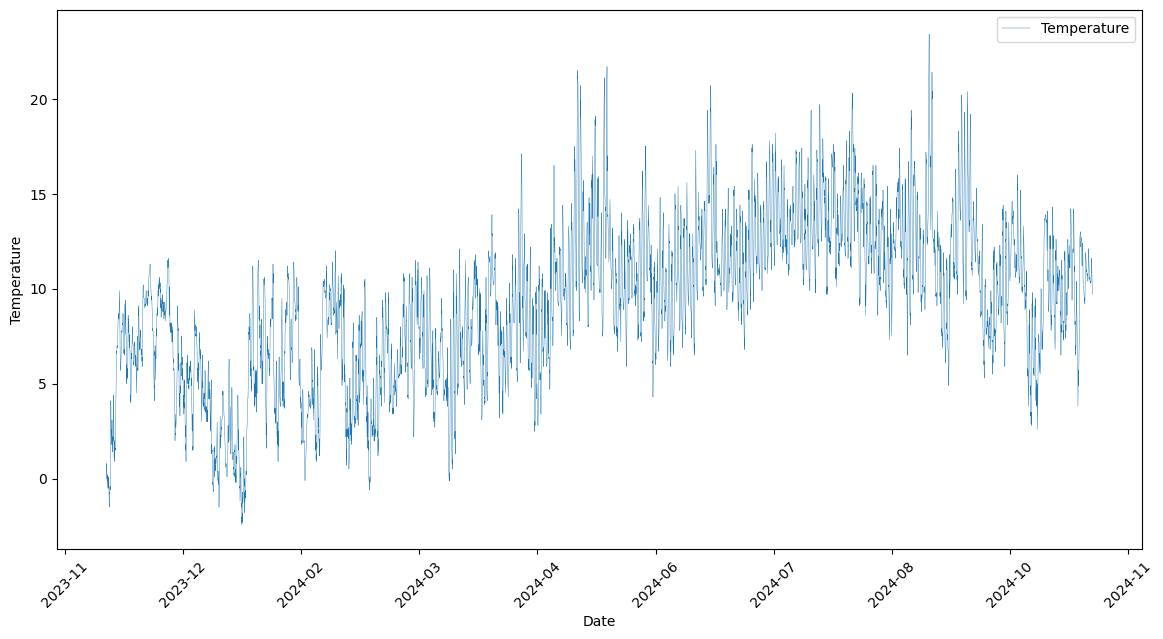

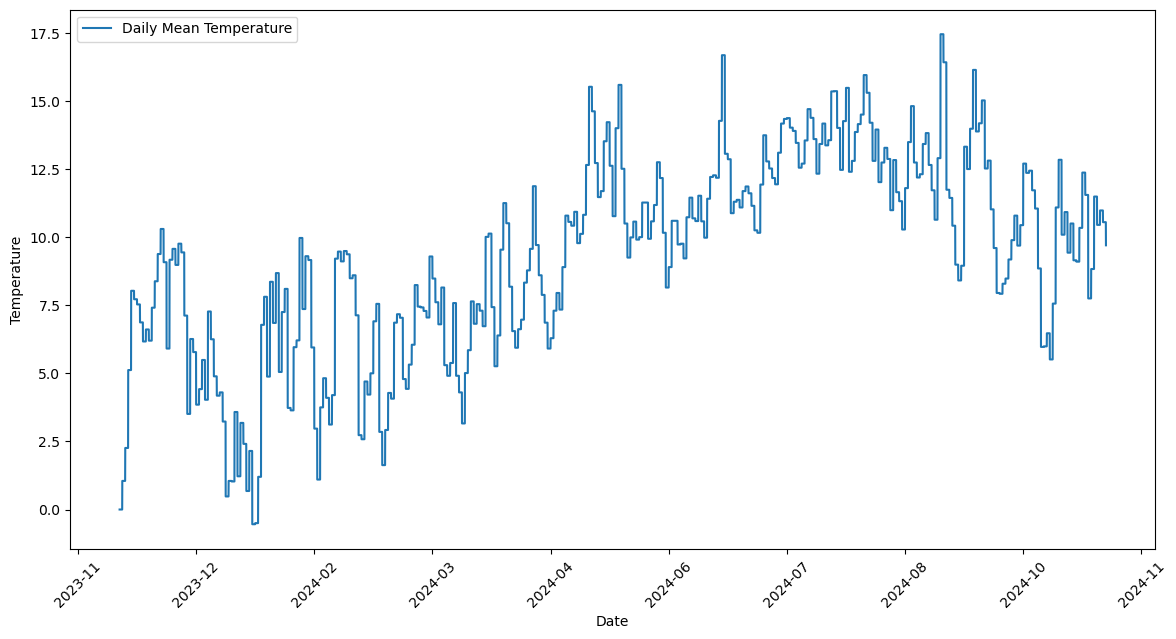

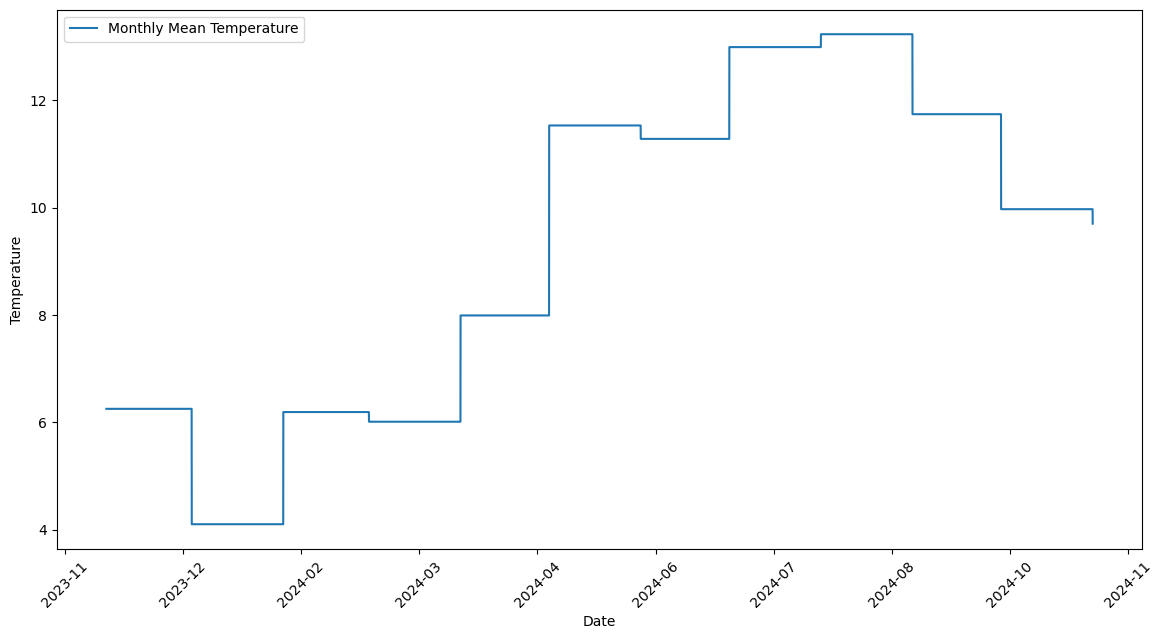

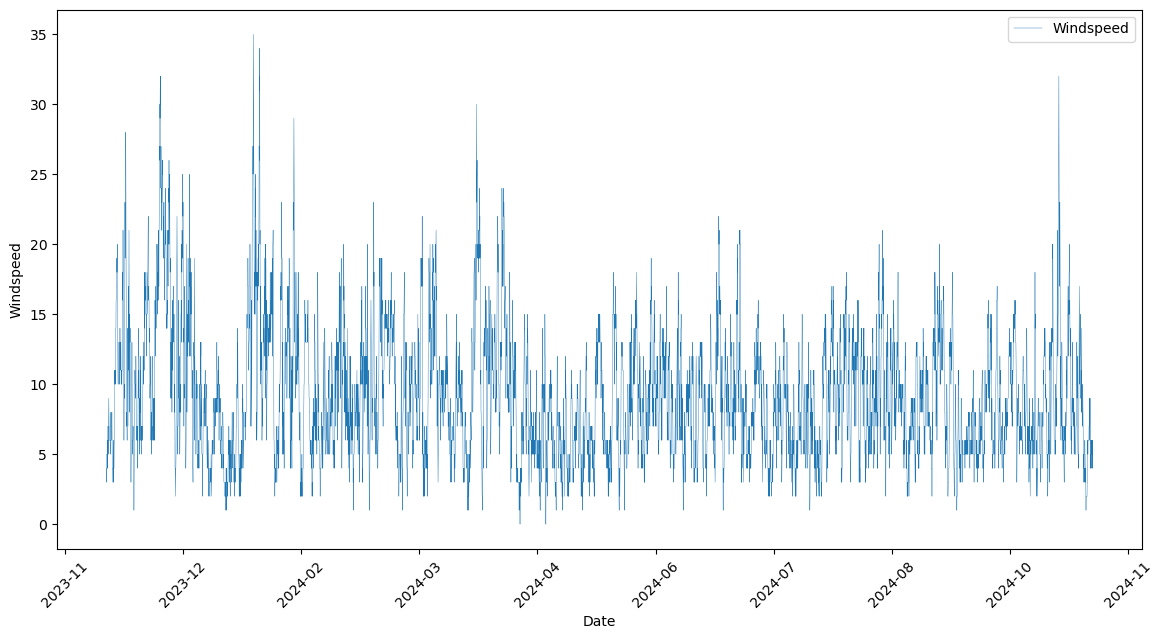

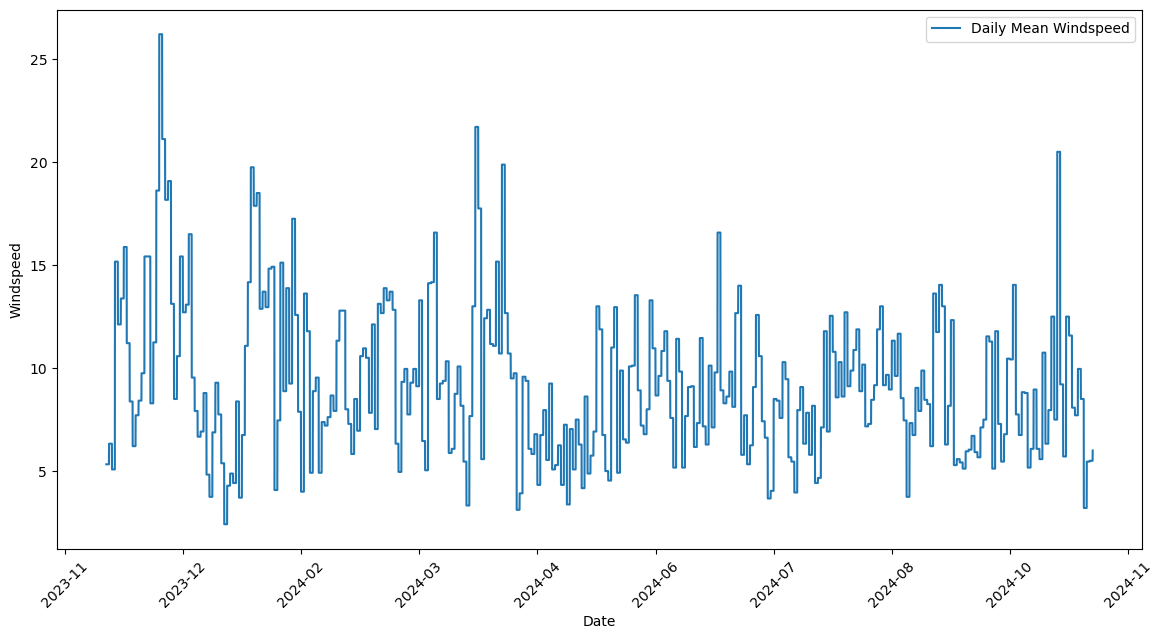

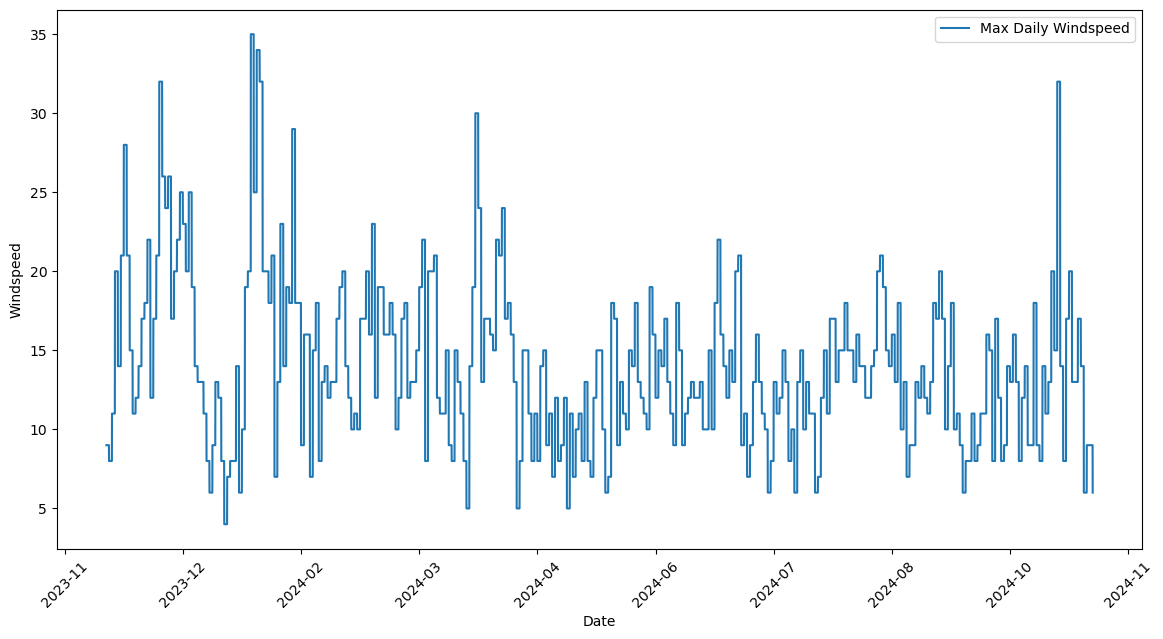

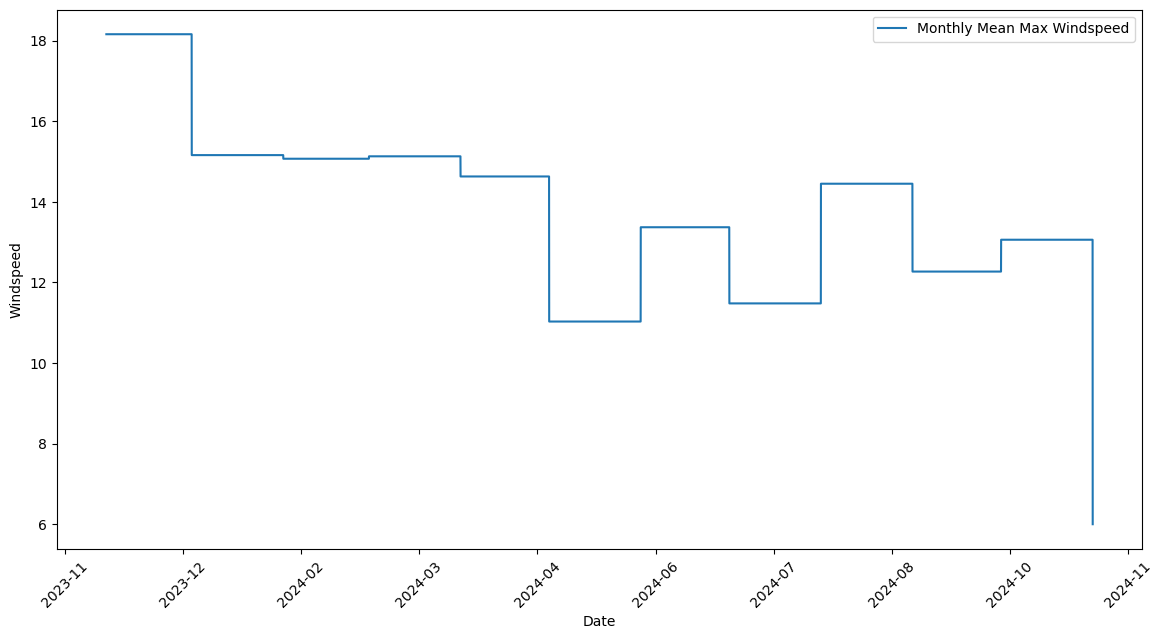

In [51]:
# Filter data for the past year
one_year_ago = pd.Timestamp.now() - pd.DateOffset(years=1)
plot1_last_year = plot1[plot1['date'] >= one_year_ago]

plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='temp', data=plot1_last_year, linewidth=0.3, label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=len(plot1_last_year['date'].dt.month.unique())))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='daily_mean_temp', data=plot1_last_year, label='Daily Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=len(plot1_last_year['date'].dt.month.unique())))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='monthly_mean_temp', data=plot1_last_year, label='Monthly Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=len(plot1_last_year['date'].dt.month.unique())))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='wdsp', data=plot1_last_year, linewidth=0.3, label='Windspeed')
plt.xlabel('Date')
plt.ylabel('Windspeed')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=len(plot1_last_year['date'].dt.month.unique())))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='daily_mean_windspeed', data=plot1_last_year, label='Daily Mean Windspeed')
plt.xlabel('Date')
plt.ylabel('Windspeed')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=len(plot1_last_year['date'].dt.month.unique())))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='max_daily_windspeed', data=plot1_last_year, label='Max Daily Windspeed')
plt.xlabel('Date')
plt.ylabel('Windspeed')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=len(plot1_last_year['date'].dt.month.unique())))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='monthly_mean_max_windspeed', data=plot1_last_year, label='Monthly Mean Max Windspeed')
plt.xlabel('Date')
plt.ylabel('Windspeed')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=len(plot1_last_year['date'].dt.month.unique())))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.show()


***

## The End